# **An analysis on gender bias**

### Team: metADAta

We begin with taking a closer look at the dataset and importing the files from it. 

### **Data description**

| Name of dataframe | Columns                                                         | Description                                                                   |   |   |
|-------------------|-----------------------------------------------------------------|-------------------------------------------------------------------------------|---|---|
| articles          | [article]                                                       | Contains the name of a wikispeedia article                                    |   |   |
| categories        | [article, category]                                             | Contains the name of a wikispeedia article and its corresponding category     |   |   |
| links             | [link_source, link_target]                                      | Contains the source and target article between paths that were tested         |   |   |
| paths_finished    | [hashedIpAddress, timestamp, durationInSec, path, rating]       | Contains all finished paths                                                   |   |   |
| paths_unfinished  | [hashedIpAddress, timestamp, durationInSec, path, target, type] | Contains all unfinished paths. Type refers to the reason they were unfinished |   |   |
| female  | [women, womenLabel] | Contains a list of articles about females and their corresponding subcategory |   |   |

### **Importing the data**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

DATA_FOLDER = 'data/'
WIKISPEEDIA_PATHS = DATA_FOLDER + "wikispeedia_paths-and-graph/"

ARTICLES = WIKISPEEDIA_PATHS + "articles.tsv"
CATEGORIES = WIKISPEEDIA_PATHS + "categories.tsv"
LINKS = WIKISPEEDIA_PATHS + "links.tsv"
PATHS_FINISHED = WIKISPEEDIA_PATHS + "paths_finished.tsv"
PATHS_UNFINISHED = WIKISPEEDIA_PATHS + "paths_unfinished.tsv"

SHORTEST_PATH = WIKISPEEDIA_PATHS + "shortest-path-distance-matrix.txt"

FEMALES = DATA_FOLDER + "listwomen.txt"

In [8]:
articles = pd.read_csv(ARTICLES, sep='\t', names=["article"], skiprows = 12)
categories = pd.read_csv(CATEGORIES, sep='\t', names=["article", "category"], skiprows = 13)
links = pd.read_csv(LINKS, sep='\t', names=["link_source", "link_target"], skiprows = 12)
paths_finished = pd.read_csv(PATHS_FINISHED, sep='\t', names=["hashedIpAddress", "timestamp", 
                                                              "durationInSec", "path", "rating"], skiprows = 15)
paths_unfinished = pd.read_csv(PATHS_UNFINISHED, sep='\t', names=["hashedIpAddress", "timestamp", 
                                                                  "durationInSec", "path", "target", "type"], skiprows = 17)

female = pd.read_csv(FEMALES, sep=',', names=["women", "women_label"], skiprows = 1)

In [172]:
shortest_path = pd.read_csv(SHORTEST_PATH, names = ["len", "a"], skiprows = 16)

In [173]:
shortest_path

,len,a
0,0_____33333325634333435_2433544334_3_422343544...,NaN
1,_0____22222325623232424_2422544324_3_312242544...,NaN
2,__0___33222425623232324_2333444433_3_422343434...,NaN
3,___0__33333325634233334_2433434333_2_423343433...,NaN
4,____0_22323335633332435_2433545434_3_423343544...,NaN
...,...,...
4599,______22222325622231424_1322544334_3_422232544...,NaN
4600,______33333434523232434_2332544324_3_323333544...,NaN
4601,______22222424522231434_2322545434_3_422232544...,NaN
4602,______33333436733342435_2433545444_3_523353544...,NaN


#### **Dataset statistics**

##### **Articles**

In [17]:
print(f"Number of articles in the dataset: {len(articles)}")
articles.head(10)

Number of articles in the dataset: 4604


,article
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts
5,%E2%82%AC2_commemorative_coins
6,10th_century
7,11th_century
8,12th_century
9,13th_century


##### **Categories**

In [19]:
print(f"Number of rows in the dataset: {len(categories)}")
categories.head()

Number of rows in the dataset: 5204


,article,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists


In [18]:
# Number of articles in each category
n_artcat = categories.groupby(categories["category"]).nunique()

print(f"The number of categories is {len(n_artcat)}")
n_artcat

The number of categories is 129


,article
category,
subject.Art.Art,36
subject.Art.Artists,2
subject.Business_Studies.Business,28
subject.Business_Studies.Companies,18
subject.Business_Studies.Currency,14
...,...
subject.Science.Physics.Electricity_and_Electronics,20
subject.Science.Physics.General_Physics,55
subject.Science.Physics.Space_Astronomy,105


##### **Links**

In [23]:
print(f"Number of combinations of source and target articles in the dataset: {len(links)}")
links.head(5)

Number of combinations of source and target articles in the dataset: 119882


,link_source,link_target
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Bede
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Columba
2,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,D%C3%A1l_Riata
3,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Great_Britain
4,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,Ireland


##### **Finished paths**

In [20]:
print(f"Number of finished paths: {len(paths_finished)}")
paths_finished.head(5)

Number of finished paths: 51318


,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0


##### **Unfinished paths**

In [21]:
print(f"Number of unfinished paths: {len(paths_unfinished)}")
paths_unfinished.head(5)

Number of unfinished paths: 24875


,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout


##### **Females**

In [26]:
print(f"Number of articles about women: {len(female)}")
female.head(5)

Number of articles about women: 59


,women,women_label
0,Bette_Davis,subject.People.Actors_models_and_celebrities
1,Britney_Spears,subject.People.Actors_models_and_celebrities
2,Diane_Keaton,subject.People.Actors_models_and_celebrities
3,Emma_Roberts,subject.People.Actors_models_and_celebrities
4,Evan_Rachel_Wood,subject.People.Actors_models_and_celebrities


### **Visulizations**

#### TASK: Make a visualization about the subcategories of women - compare to men's subcategories

We begin with constructing a new dataframe `people` that contains all articles in the category of People (refers to "subject.People") and their corresponding subcategory.

In [9]:
people = categories.loc[list(map(lambda x: x.startswith('subject.People.'), categories['category']))]
people = people[["article","category"]]
print(f"The number of articles about people of all genders are {len(people)}")

The number of articles about people of all genders are 689


We will now create two new dataframes, called `finpaths_women_target` and `finpaths_men_target`, that contain respectively all finished paths that have a women and men as a target article. We begin with constructing a pandas series `womenName` of all articles about women using the handmade `female` dataframe. Using the newly constructed `people` dataframe, we can construct a series of articles about men by filtering out every article about women from `people`. If the target article in a finished path is in any of the two women and men lists, we can construct the desired dataframe.

In [10]:
womenName = female['women']                                      # A series of all articles about women
menName = people[~people['article'].isin(womenName)]['article']  # A series of all articles about men

# Add the columns source and target to paths_finished
paths_finished['source'] = paths_finished['path'].str.split(';').str[0]
paths_finished['target'] = paths_finished['path'].str.split(';').str[-1]

# if target is in womenName, add row to dataframe
finpaths_women_target = paths_finished[paths_finished['target'].isin(womenName)]

# if target is in menName, add row to dataframe
finpaths_men_target = paths_finished[paths_finished['target'].isin(menName)]

##### Finished paths with women and men target articles

In [11]:
print(f"Number of articles that have women as a target is {len(finpaths_women_target)}")
print(f"Number of articles that have men as a target is {len(finpaths_men_target)}")

Number of articles that have women as a target is 347
Number of articles that have men as a target is 5566


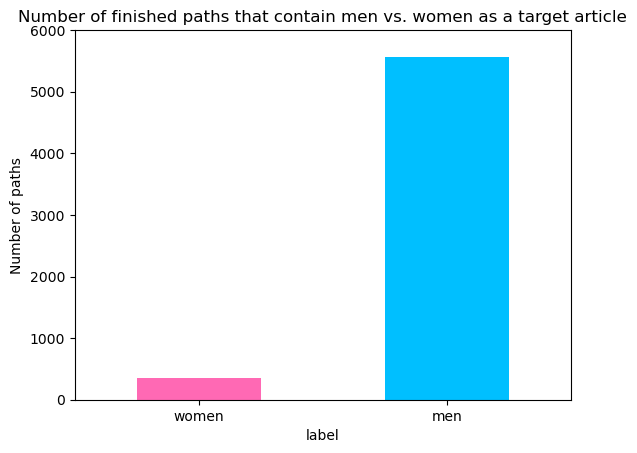

In [12]:
compare_mv_fin = pd.DataFrame({'label':['women', 'men'], 'val':[len(finpaths_women_target), len(finpaths_men_target)]})
ax = compare_mv_fin.plot.bar(x='label', y='val', rot = 0, color = ['hotpink','deepskyblue'], legend = False,
                             title = "Number of finished paths that contain men vs. women as a target article",
                             ylabel = 'Number of paths', ylim = [0, 6000])

##### Unfinished paths with women and men target articles

In [13]:
# Add the column source to paths_unfinished
paths_unfinished['source'] = paths_unfinished['path'].str.split(';').str[0]

# if target is in womenName, add row to dataframe
unfinpaths_women_target = paths_unfinished[paths_unfinished['target'].isin(womenName)]

# if target is in menName, add row to dataframe
unfinpaths_men_target = paths_unfinished[paths_unfinished['target'].isin(menName)]

In [14]:
print(f"Number of unfinished paths that have women as a target {len(unfinpaths_women_target)}")
print(f"Number of unfinished paths that have men as a target {len(unfinpaths_men_target)}")

Number of unfinished paths that have women as a target 342
Number of unfinished paths that have men as a target 2374


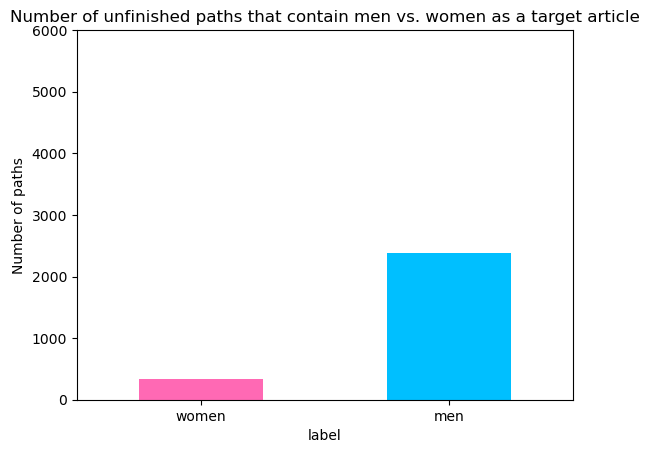

In [15]:
compare_mv_unfin = pd.DataFrame({'label':['women', 'men'], 'val':[len(unfinpaths_women_target), len(unfinpaths_men_target)]})
ax = compare_mv_unfin.plot.bar(x = 'label', y = 'val', rot = 0, color = ['hotpink','deepskyblue'], legend = False,
                               title = "Number of unfinished paths that contain men vs. women as a target article",
                               ylabel = 'Number of paths', ylim = [0, 6000])

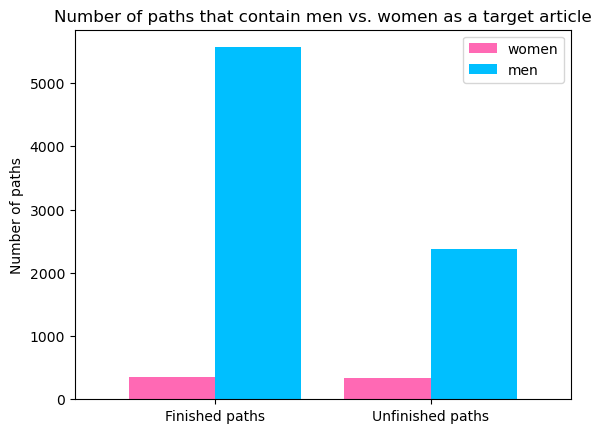

In [16]:
women = [len(finpaths_women_target), len(unfinpaths_women_target)]
men = [len(finpaths_men_target), len(unfinpaths_men_target)]
index = ['Finished paths', 'Unfinished paths']
compare_mv = pd.DataFrame({'women': women,'men': men}, index=index)
ax = compare_mv.plot.bar(rot=0, color = ['hotpink','deepskyblue'], 
                         title = "Number of paths that contain men vs. women as a target article",
                         ylabel = 'Number of paths', width = 0.8)

Total number of unique categories for people are:  20


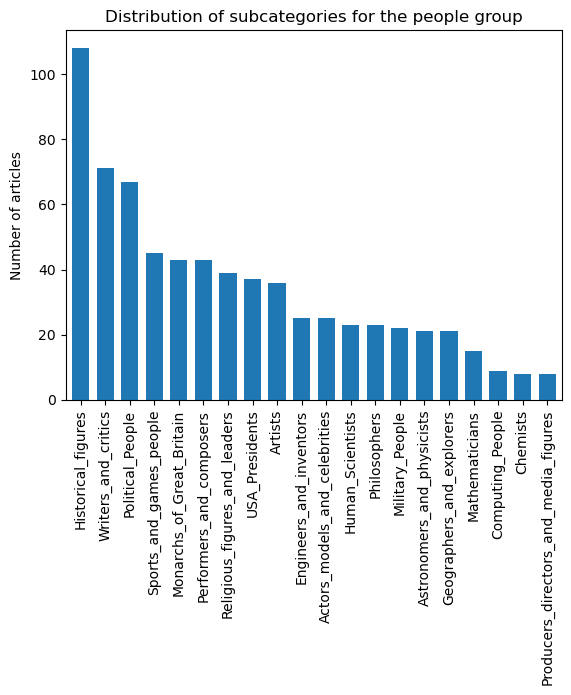

In [61]:
categories_dist = people["category"].str.slice_replace(0, 15, '').value_counts()
print("Total number of unique categories for people are: ", len(categories_dist))
categories_dist.plot.bar(title = "Distribution of subcategories for the people group",
                         ylabel = 'Number of articles', width = 0.7)
plt.show()

In [32]:
womenPeople = people[people['article'].isin(womenName)]
menPeople = people[people['article'].isin(menName)]

Total number of unique categories for people are:  12


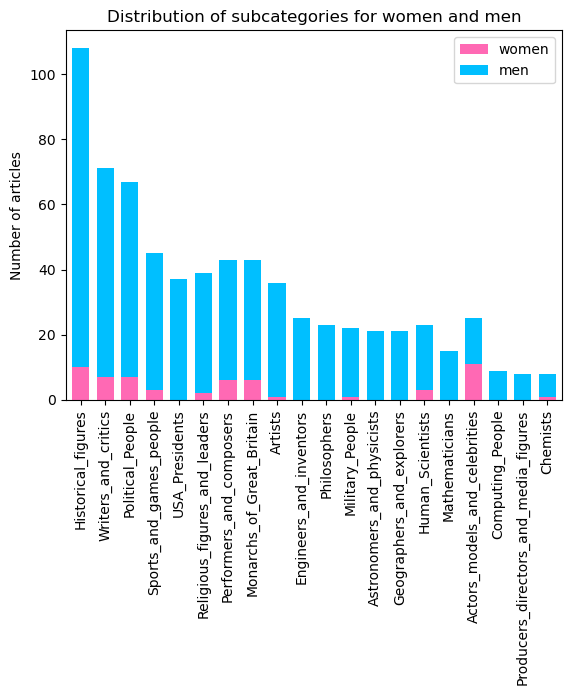

In [64]:
women = womenPeople["category"].str.slice_replace(0, 15, '').value_counts()
men = menPeople["category"].str.slice_replace(0, 15, '').value_counts()
index = men.keys()
print("Total number of unique categories for people are: ", len(women))
df = pd.DataFrame({'women': women,
                   'men': men}, index=index)
ax = df.plot.bar(stacked = True, color = ['hotpink', 'deepskyblue'], 
                         title = "Distribution of subcategories for women and men",
                         ylabel = 'Number of articles', width = 0.7)

plt.show()

#### MERGE 

By merging `finpaths_women_target` and `finpaths_men_target` on the source article, we can construct a dataframe `comb` that contains rows of all pairs of two target articles (one about a woman, the other about a man) with the same source article.

Example: If five different paths exist from the source article *14th_century* towards the target article *Elizabeth_I_of_England*, and two different paths exist from the same source article towards the target article *John_F._Kennedy*, we would get $5 \times 2 = 10$ number of pairs to compare.

In [154]:
comb_finpaths = finpaths_women_target[["source", "path", "target"]].merge(finpaths_men_target[["source", "path", "target"]], 
                                                        on=['source'], how = "inner",
                                                        suffixes=('_women', '_men'))

In [155]:
comb_finpaths

,source,path_women,target_women,path_men,target_men
0,14th_century,14th_century;England;London;Spanish_Armada;Eng...,Elizabeth_I_of_England,14th_century;Italy;Roman_Catholic_Church;HIV;R...,John_F._Kennedy
1,14th_century,14th_century;England;London;Spanish_Armada;Eng...,Elizabeth_I_of_England,14th_century;Europe;North_America;United_State...,John_F._Kennedy
2,14th_century,14th_century;England;London;Spanish_Armada;Eng...,Elizabeth_I_of_England,14th_century;Europe;<;England;<;Christianity;A...,Henry_David_Thoreau
3,14th_century,14th_century;England;James_I_of_England;Elizab...,Elizabeth_I_of_England,14th_century;Italy;Roman_Catholic_Church;HIV;R...,John_F._Kennedy
4,14th_century,14th_century;England;James_I_of_England;Elizab...,Elizabeth_I_of_England,14th_century;Europe;North_America;United_State...,John_F._Kennedy
...,...,...,...,...,...
469,Ununoctium,Ununoctium;Uranium;World_War_II;The_Holocaust;...,Anne_Frank,Ununoctium;Russia;United_Kingdom;British_monar...,Henry_IV_of_England
470,William_Pitt_the_Younger,William_Pitt_the_Younger;Prime_Minister_of_the...,Miranda_Otto,William_Pitt_the_Younger;British_Empire;Ottoma...,Socrates
471,Windows_2000,Windows_2000;North_America;California;Arnold_S...,Bette_Davis,Windows_2000;Microsoft;United_States;George_Wa...,Ronald_Reagan
472,Windows_2000,Windows_2000;North_America;United_States;Cinem...,Bette_Davis,Windows_2000;Microsoft;United_States;George_Wa...,Ronald_Reagan


#### Getting familiar with the merged data

In [157]:
sources = comb.groupby(comb["source"]).count()
print("The number of distinct sources that go both to women and men are {}".format(len(sources)))
print("The number of paths from all of these sources are {}".format(len(comb)))

The number of distinct sources that go both to women and men are 118
The number of paths from all of these sources are 474


In [158]:
df = sources.loc[sources['target_women'] != 1]
df

,path_women,target_women,path_men,target_men
source,,,,
14th_century,15,15,15,15
16th_century,2,2,2,2
Able_Archer_83,2,2,2,2
Acid_rain,8,8,8,8
Apollo_11,2,2,2,2
...,...,...,...,...
Vitamin_D,10,10,10,10
Walrus,2,2,2,2
Western_Sahara,3,3,3,3


In [16]:
#with pd.option_context('display.max_rows', None,
#                       'display.max_columns', None,
#                       'display.precision', 3,
#                       ):
#    print(comb)

**Actors_models_and_celebrities**

In [ ]:
# Let's first take a look at the category subject.People.Actors_models_and_celebrities
wikispeedia_actors = categories[categories["category"] == "subject.People.Actors_models_and_celebrities"]
wikispeedia_actors

,article,category
276,Andrew_Robinson,subject.People.Actors_models_and_celebrities
638,Bette_Davis,subject.People.Actors_models_and_celebrities
760,Brandon_Routh,subject.People.Actors_models_and_celebrities
787,Britney_Spears,subject.People.Actors_models_and_celebrities
793,Bruce_Lee,subject.People.Actors_models_and_celebrities
971,Charlie_Chaplin,subject.People.Actors_models_and_celebrities
1017,Christian_Bale,subject.People.Actors_models_and_celebrities
1278,Daniel_Day-Lewis,subject.People.Actors_models_and_celebrities
1344,Diane_Keaton,subject.People.Actors_models_and_celebrities
1547,Emma_Roberts,subject.People.Actors_models_and_celebrities


**TACKLE ALL PEOPLE CATEGORIES**

In [30]:
df = categories
df['categories_people'] = list(
    map(lambda x: x.startswith('subject.People.'), df['category'])) 

In [6]:
people = df[df["categories_people"] == True]
people

,article,category,categories_people
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures,True
4,%C3%89douard_Manet,subject.People.Artists,True
8,%C3%93engus_I_of_the_Picts,subject.People.Historical_figures,True
67,A._E._J._Collins,subject.People.Sports_and_games_people,True
88,Abbas_I_of_Persia,subject.People.Historical_figures,True
...,...,...,...
5188,Zhang_Qian,subject.People.Historical_figures,True
5190,Zheng_He,subject.People.Historical_figures,True
5191,Ziad_Jarrah,subject.People.Historical_figures,True
5197,Zionism,subject.People.Political_People,True


#### Check every subgroup 

In [35]:
actors = categories[categories["category"] == "subject.People.Actors_models_and_celebrities"]
artist = categories[categories["category"] == "subject.People.Artists"]
astro = categories[categories["category"] == "subject.People.Astronomers_and_physicists"]
chemist = categories[categories["category"] == "subject.People.Chemists"]
comp = categories[categories["category"] == "subject.People.Computing_People"]
eng = categories[categories["category"] == "subject.People.Engineers_and_inventors"]
geo = categories[categories["category"] == "subject.People.Geographers_and_explorers"]
hist = categories[categories["category"] == "subject.People.Historical_figures"]

humsci = categories[categories["category"] == "subject.People.Human_Scientists"]
math = categories[categories["category"] == "subject.People.Mathematicians"]
mil = categories[categories["category"] == "subject.People.Military_People"]
mon = categories[categories["category"] == "subject.People.Monarchs_of_Great_Britain"]
perf = categories[categories["category"] == "subject.People.Performers_and_composers"]
phil = categories[categories["category"] == "subject.People.Philosophers"]
pol = categories[categories["category"] == "subject.People.Political_People"]
prod = categories[categories["category"] == "subject.People.Producers_directors_and_media_figures"] 

rel = categories[categories["category"] == "subject.People.Religious_figures_and_leaders"]
sport = categories[categories["category"] == "subject.People.Sports_and_games_people"]
usa = categories[categories["category"] == "subject.People.USA_Presidents"]
writ = categories[categories["category"] == "subject.People.Writers_and_critics"]